# Configs

In [1]:
import pandas
import nglview

import numpy as np
import mdtraj as md

import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from nglview.contrib.movie import MovieMaker

IMAGE_SIZE = "400px"

In [4]:
molecule = "alanine"
temperature = "300.0"
date = "25-02-14/15:19"
state = "c5"

# simulation_dir = f"../log/{molecule}/{temperature}/{date}/{time}"
simulation_dir = f"../log/{molecule}/{temperature}/test"
pdb_file = f"../data/{molecule}/{state}.pdb"

In [5]:
loaded_traj = md.load(
	f"{simulation_dir}/traj.dcd",
	top=pdb_file
)

# Ramachandran plot

In [6]:
phi_list = md.compute_phi(loaded_traj)[1].squeeze(1)
psi_list = md.compute_psi(loaded_traj)[1].squeeze(1)
phi_list.shape
phi_list.shape

(10000,)

<Figure size 640x480 with 0 Axes>

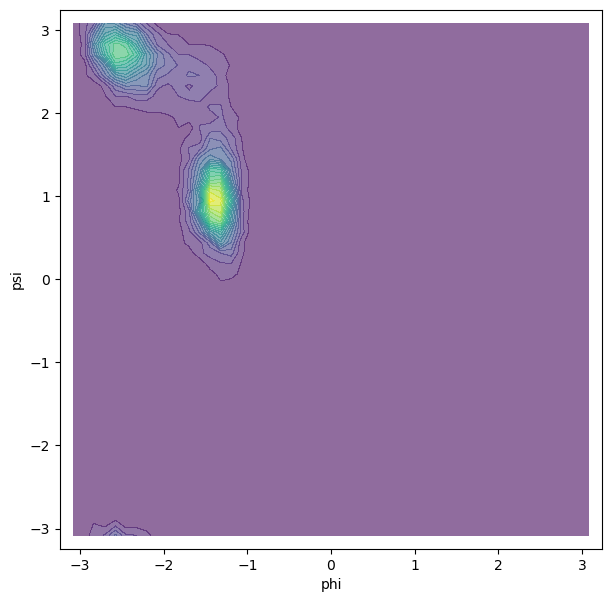

In [7]:
plt.clf()
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

hist, xedges, yedges = np.histogram2d(phi_list, psi_list, bins=50, range=[[-np.pi, np.pi], [-np.pi, np.pi]])

# Compute the centers of the bins
xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2

# Plot the contour
X, Y = np.meshgrid(xcenters, ycenters)
ax.contourf(X, Y, hist.T, levels=20, cmap='viridis', alpha=0.6)

# Plot start and goal states
# ax.scatter(phi_start, psi_start, edgecolors="black", c="w", zorder=101, s=160)
# ax.scatter(phi_goal, psi_goal, edgecolors="black", c="w", zorder=101, s=500, marker="*")

# Plot the Ramachandran plot
plt.xlim([-np.pi - 0.1, np.pi + 0.1])
plt.ylim([-np.pi - 0.1, np.pi + 0.1])
plt.xlabel("phi")
plt.ylabel("psi")
plt.show()

# Visualization

In [8]:
view = nglview.show_mdtraj(loaded_traj, width=IMAGE_SIZE, height=IMAGE_SIZE)
view

NGLWidget(max_frame=9999)

In [5]:
view.frame

0

In [25]:
view.download_image(
    filename=f"{molecule}-{view.frame}.png",
    factor=3,
    antialias=True,
    trim=False,
    transparent=True
)

In [6]:
alanine_gif = MovieMaker(
    view = view,
    step = 10,
    fps = 40,
    output = f"img/alanine.gif",
)
alanine_gif.make(movie=True, keep_data=False)

IntProgress(value=0, description='Rendering ...', max=399)